# Team-1-ExcelR-P57

# Topic Modelling

## Business objective
Social event tracking and evolution framework to obtain the evolutionary trends of social events and generate effective event summary details over time. The input is the  textual data collected from various social media. Based on the input data, our algorithm can learn multi-modality topics and track multiple events. After tracking, for each event, it can be visualized with texts and image over time. 

## Data Set Details:
Extraction of the textual data from various web sources like "Twitter"

In [2]:
# Importing important libraries
import tweepy
import pandas as pd
import re
import emoji
import nltk

In [3]:
# set variables for keys and tokens to access the Twitter API
mykeys = open('D:\\jupyter notebook workspace\\PROJECTS\\Topic Modeling\\tweetfile.txt','r').read().splitlines()
api_key = mykeys[0]
api_key_secret = mykeys[1]
access_token = mykeys[2]
access_token_secret = mykeys[3]

auth = tweepy.OAuthHandler(consumer_key = api_key, consumer_secret = api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [21]:
# #Featching the data from twitter
# search_words="news"
# date_since="2021-07-13"
# tweets = tweepy.Cursor(api.search,
#               q=search_words,
#               lang="en",
#               since=date_since)

In [22]:
# PAGES = tweepy.Cursor(api.search, q='news', count=10, tweet_mode='extended').pages(2)
# # Iterate and print tweets
# l=[]
# for tweet in PAGES:
#     l.append(tweet.text)

In [23]:
# print(l)

In [25]:
#Featching the data from twitter
search_words="news"
date_since="2021-07-13"
tweets = tweepy.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(500)

# Iterate and print tweets
s=[]
for tweet in tweets:
    s.append(tweet.text)

In [26]:
print(s)

["Great news - we're now on Instagram! 📲 \n\nFollow along for hints and tips to make better energy choices for your hom… https://t.co/ukyDknXFo9", 'RT @Apollo_X_: APY Staking Rewards Announcement!\n\nHUGE news regarding APY rewards for staking participants in the @OMNI_AI $OMN IDO launchi…', 'RT @AfricaMediaHub: .@PowerUSAID: In places where religious &amp; ethnic minorities are specifically targeted like today in the Tigray region o…', 'RT @michaelhsweet: I’m deeply saddened to hear the news of the passing of Jeff LaBar. I had the honor of meeting Jeff multiple times when h…', "RT @ttokitae: #BTS\xa0 Single 'Butter' OFFICIAL MERCHANDISE | photo banner (1) \n\n https://t.co/YhkxaXMics https://t.co/NO766WjAVT", "RT @AndyNaylorBHAFC: The latest on Brighton's interest in Marc Cucurella.\nJose's lurking but Cucurella's desire to play at left-back and th…", 'RT @senyorreporter: Column: We should seize this opportunity to try passenger rail service between Tucson and Phoenix. \nhttps://t.co/

In [27]:
df=pd.DataFrame({'tweet':s})
pd.set_option("display.max_colwidth", None)
df

,tweet
0,Great news - we're now on Instagram! 📲 \n\nFollow along for hints and tips to make better energy choices for your hom… https://t.co/ukyDknXFo9
1,RT @Apollo_X_: APY Staking Rewards Announcement!\n\nHUGE news regarding APY rewards for staking participants in the @OMNI_AI $OMN IDO launchi…
2,RT @AfricaMediaHub: .@PowerUSAID: In places where religious &amp; ethnic minorities are specifically targeted like today in the Tigray region o…
3,RT @michaelhsweet: I’m deeply saddened to hear the news of the passing of Jeff LaBar. I had the honor of meeting Jeff multiple times when h…
4,RT @ttokitae: #BTS Single 'Butter' OFFICIAL MERCHANDISE | photo banner (1) \n\n https://t.co/YhkxaXMics https://t.co/NO766WjAVT
...,...
495,"RT @HaydenJOConnor: .@lindareynoldswa was on #afternoonbriefing today telling us that the NDIS is unsustainable long term, due to its yearl…"
496,@joshachusetts Yaaaassss hunny! Great news!
497,"RT @WhatsOnStage: Exclusive video: Watch Kevin Clifton, Charlotte Gooch and Adam Cooper in Singin' in the Rain rehearsals https://t.co/d2M1…"
498,RT @modooborahae: SBS News had a segment about @BTS_twt’s global economic/brand power: (LONG)\n👨🏻 It’s now time for us to have Jeong Ho-sun…


In [28]:
# make a new column to highlight retweets
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets
df

,tweet,is_retweet
0,Great news - we're now on Instagram! 📲 \n\nFollow along for hints and tips to make better energy choices for your hom… https://t.co/ukyDknXFo9,False
1,RT @Apollo_X_: APY Staking Rewards Announcement!\n\nHUGE news regarding APY rewards for staking participants in the @OMNI_AI $OMN IDO launchi…,True
2,RT @AfricaMediaHub: .@PowerUSAID: In places where religious &amp; ethnic minorities are specifically targeted like today in the Tigray region o…,True
3,RT @michaelhsweet: I’m deeply saddened to hear the news of the passing of Jeff LaBar. I had the honor of meeting Jeff multiple times when h…,True
4,RT @ttokitae: #BTS Single 'Butter' OFFICIAL MERCHANDISE | photo banner (1) \n\n https://t.co/YhkxaXMics https://t.co/NO766WjAVT,True
...,...,...
495,"RT @HaydenJOConnor: .@lindareynoldswa was on #afternoonbriefing today telling us that the NDIS is unsustainable long term, due to its yearl…",True
496,@joshachusetts Yaaaassss hunny! Great news!,False
497,"RT @WhatsOnStage: Exclusive video: Watch Kevin Clifton, Charlotte Gooch and Adam Cooper in Singin' in the Rain rehearsals https://t.co/d2M1…",True
498,RT @modooborahae: SBS News had a segment about @BTS_twt’s global economic/brand power: (LONG)\n👨🏻 It’s now time for us to have Jeong Ho-sun…,True


In [29]:
 # number of unique retweets
df.loc[df['is_retweet']].tweet.unique().size

281

In [30]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)

,tweet,counts
391,RT @ttokitae: #BTS Single 'Butter' OFFICIAL MERCHANDISE | photo banner (1) \n\n https://t.co/YhkxaXMics https://t.co/NO766WjAVT,17
125,RT @AinieHaziqah: Most heartbreaking news I received today.\n\nArwah akak ini was one of our participants in program menjahit PPE for frontli…,10
171,RT @GenshinImpact: Today is #HuTao birthday!\n\nIs this a chance encounter or did you come to Wuwang Hill to look for me specially?\nLooks lik…,9
265,"RT @TeleEnvironment: 🔴@NASA is warning of a ""wobble"" in the moon's orbit that is set to see the world face significantly more natural disas…",4
137,"RT @BBCWorld: ""No more excuses"" - COP26 climate summit must be ""moment of delivery"", developing countries say https://t.co/UQvPX4tFAk",4
326,"RT @j_pedneault: #Belarus: new spree of raids and detentions takes specific aim at human rights groups, in blatant retaliation for their wo…",3
165,"RT @DrEricDing: 📍A 24-year-old man refused the vaccine, but then contracted #COVID19 (in Florida), got hospitalized, intubated, on ventilat…",3
229,RT @PeterStefanovi2: The interview UK News shows continue to withhold from the public\n\nBoris Johnson promising NO CHECKS on goods going fro…,2
383,RT @theHWF: It is beyond heartbreaking that so many health and social care staff have lost their lives fighting Covid.\n\nIf you have lost a…,2
394,"RT @whittledaway: The OPW digs them out, Irish Water pumps human filth into them, farming washes its excess slurry and fertiliser into them…",2


In [32]:
import numpy as np
import matplotlib.pyplot as plt

<ipython-input-33-e1d285608ea2>:13: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


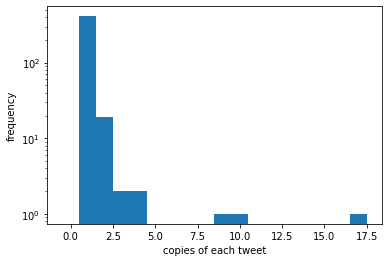

In [33]:
# number of times each tweet appears
counts = df.groupby(['tweet']).size().reset_index(name='counts').counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [34]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

In [35]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)

In [36]:
df

,tweet,is_retweet,retweeted,mentioned,hashtags
0,Great news - we're now on Instagram! 📲 \n\nFollow along for hints and tips to make better energy choices for your hom… https://t.co/ukyDknXFo9,False,[],[],[]
1,RT @Apollo_X_: APY Staking Rewards Announcement!\n\nHUGE news regarding APY rewards for staking participants in the @OMNI_AI $OMN IDO launchi…,True,[@Apollo_X_],[@OMNI_AI],[]
2,RT @AfricaMediaHub: .@PowerUSAID: In places where religious &amp; ethnic minorities are specifically targeted like today in the Tigray region o…,True,[@AfricaMediaHub],[@PowerUSAID],[]
3,RT @michaelhsweet: I’m deeply saddened to hear the news of the passing of Jeff LaBar. I had the honor of meeting Jeff multiple times when h…,True,[@michaelhsweet],[],[]
4,RT @ttokitae: #BTS Single 'Butter' OFFICIAL MERCHANDISE | photo banner (1) \n\n https://t.co/YhkxaXMics https://t.co/NO766WjAVT,True,[@ttokitae],[],[#BTS]
...,...,...,...,...,...
495,"RT @HaydenJOConnor: .@lindareynoldswa was on #afternoonbriefing today telling us that the NDIS is unsustainable long term, due to its yearl…",True,[@HaydenJOConnor],[@lindareynoldswa],[#afternoonbriefing]
496,@joshachusetts Yaaaassss hunny! Great news!,False,[],[@joshachusetts],[]
497,"RT @WhatsOnStage: Exclusive video: Watch Kevin Clifton, Charlotte Gooch and Adam Cooper in Singin' in the Rain rehearsals https://t.co/d2M1…",True,[@WhatsOnStage],[],[]
498,RT @modooborahae: SBS News had a segment about @BTS_twt’s global economic/brand power: (LONG)\n👨🏻 It’s now time for us to have Jeong Ho-sun…,True,[@modooborahae],[@BTS_twt],[]


In [39]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[df.hashtags.apply(lambda hashtags_list: hashtags_list !=[]),['hashtags']]
hashtags_list_df

,hashtags
4,[#BTS]
7,[#BTS]
14,[#HuTao]
16,[#TigrayGenocide]
19,[#cybersecur]
...,...
476,[#RT]
485,[#RT]
488,[#Artemis]
494,"[#netflix, #videogames]"


In [40]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame([hashtag for hashtags_list in hashtags_list_df.hashtags for hashtag in hashtags_list],
                                     columns=['hashtag'])
flattened_hashtags_df

,hashtag
0,#BTS
1,#BTS
2,#HuTao
3,#TigrayGenocide
4,#cybersecur
...,...
183,#RT
184,#Artemis
185,#netflix
186,#videogames


In [42]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

128

In [43]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)
popular_hashtags

,hashtag,counts
0,#BTS,19
1,#HuTao,9
2,#NEWS,6
3,#RahulVaidya,5
4,#FridayLivestream,5
...,...,...
123,#KeepitOn,1
124,#JordanTimes,1
125,#JayZ,1
126,#Japan,1


In [45]:
# take hashtags which appear at least this amount of times
min_appearance =10

# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[popular_hashtags.counts>=min_appearance]['hashtag'])
popular_hashtags_set

{'#BTS'}

In [46]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
hashtags_list_df

,hashtags,popular_hashtags
4,[#BTS],[#BTS]
7,[#BTS],[#BTS]
14,[#HuTao],[]
16,[#TigrayGenocide],[]
19,[#cybersecur],[]
...,...,...
476,[#RT],[]
485,[#RT],[]
488,[#Artemis],[]
494,"[#netflix, #videogames]",[]


In [47]:
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]
popular_hashtags_list_df

,hashtags,popular_hashtags
4,[#BTS],[#BTS]
7,[#BTS],[#BTS]
43,[#BTS],[#BTS]
72,[#BTS],[#BTS]
146,[#BTS],[#BTS]
186,[#BTS],[#BTS]
199,[#BTS],[#BTS]
201,[#BTS],[#BTS]
221,[#BTS],[#BTS]
236,[#BTS],[#BTS]


In [48]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [49]:
hashtag_vector_df

,popular_hashtags,#BTS
4,[#BTS],1
7,[#BTS],1
43,[#BTS],1
72,[#BTS],1
146,[#BTS],1
186,[#BTS],1
199,[#BTS],1
201,[#BTS],1
221,[#BTS],1
236,[#BTS],1


In [50]:
import seaborn as sns
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)
hashtag_matrix

,#BTS
4,1
7,1
43,1
72,1
146,1
186,1
199,1
201,1
221,1
236,1


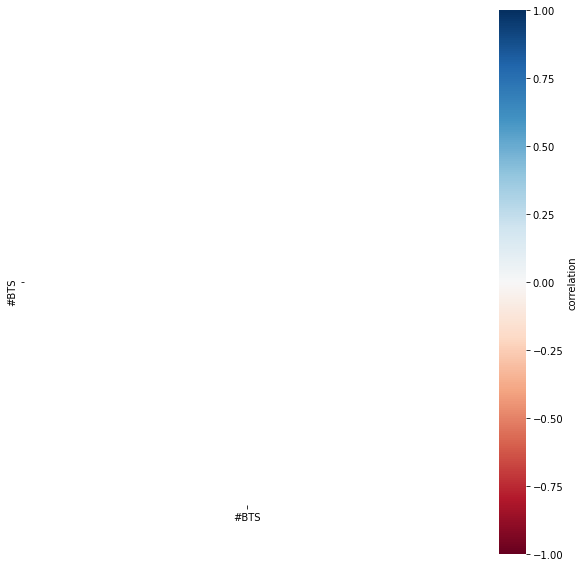

In [51]:

# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

# Data Cleaning & Pre-Processing

In [52]:
import string # special operations on strings
import spacy # language models

#from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
#from wordcloud import WordCloud
%matplotlib inline

In [54]:
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\words.zip.


In [55]:
tweet=np.array(df.tweet)
tweet

array(["Great news - we're now on Instagram! 📲 \n\nFollow along for hints and tips to make better energy choices for your hom… https://t.co/ukyDknXFo9",
       'RT @Apollo_X_: APY Staking Rewards Announcement!\n\nHUGE news regarding APY rewards for staking participants in the @OMNI_AI $OMN IDO launchi…',
       'RT @AfricaMediaHub: .@PowerUSAID: In places where religious &amp; ethnic minorities are specifically targeted like today in the Tigray region o…',
       'RT @michaelhsweet: I’m deeply saddened to hear the news of the passing of Jeff LaBar. I had the honor of meeting Jeff multiple times when h…',
       "RT @ttokitae: #BTS\xa0 Single 'Butter' OFFICIAL MERCHANDISE | photo banner (1) \n\n https://t.co/YhkxaXMics https://t.co/NO766WjAVT",
       "RT @AndyNaylorBHAFC: The latest on Brighton's interest in Marc Cucurella.\nJose's lurking but Cucurella's desire to play at left-back and th…",
       'RT @senyorreporter: Column: We should seize this opportunity to try passenger rail ser

In [57]:
cleaned_tweet=[]
for i in df.tweet:
    no_punc_text = i.translate(str.maketrans('', '', string.punctuation))
    no_punc_text=re.sub("(RT)?(ht)?", "", no_punc_text) # to remove RT and ht word
    no_punc_text1=re.sub("[\W\d]", " ", no_punc_text) #to remove not word character and numbers
    no_punc_text2=re.sub("[^a-zA-Z]", " ", no_punc_text1) #to remove forien language word character
    no_punc_text2=" ".join(w for w in nltk.wordpunct_tokenize(no_punc_text2) \
         if w.lower() in words or not w.isalpha())
    cleaned_tweet.append(no_punc_text2)
df['cleaned_tweet']=cleaned_tweet
df['cleaned_tweet'].head(10)

0                                  Great news were now on Follow along for and to make better energy for your
1                                                                 Announcement HUGE news regarding for in the
2                              In where religious ethnic are specifically targeted like today in the region o
3    I m deeply to hear the news of the passing of Jeff I had the honor of meeting Jeff multiple times when h
4                                                             Single Butter OFFICIAL MERCHANDISE photo banner
5                                                 The latest on interest in Marc but desire to play at and th
6                   Column We should seize this opportunity to try passenger rail service between and Phoenix
7                                                             Single Butter OFFICIAL MERCHANDISE photo banner
8                                                                                WHAT A GOOD NEWS and Ko will
9         

In [58]:
df1=df.copy() 
corpus=df1.cleaned_tweet.unique()

In [59]:
len(corpus)

436

##### Text Preprocessing
Steps to preprocess text data:

Convert the text into lowercase <br> 
Split text into words  <br>
Remove the stop loss words <br>
Remove the Punctuation, any symbols and special characters <br>
Normalize the word (I'll be using Lemmatization for normalization) <br>

In [60]:
# for text preprocessing
import re
import spacy

from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string

# import vectorizers
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# import numpy for matrix operation
import numpy as np

# import LDA from sklearn
from sklearn.decomposition import LatentDirichletAllocation

import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [61]:
# Lemmatize with POS Tag
from nltk.corpus import wordnet
import nltk
nltk.download('averaged_perceptron_tagger')

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


https://www.machinelearningplus.com/nlp/lemmatization-examples-python/

In [62]:

# Apply Preprocessing on the Corpus

# stop loss words 
stop = set(stopwords.words('english'))

# punctuation 
exclude = set(string.punctuation) 

# lemmatization
lemma = WordNetLemmatizer() 

# One function for all the steps:
def clean(doc):
    
    # convert text into lower case + split into words
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    
    # remove any stop words present
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)  
    
    # remove punctuations + normalize the text
    normalized = " ".join(lemma.lemmatize(word,get_wordnet_pos(word)) for word in punc_free.split())  
    return normalized

# clean data stored in a new list
clean_corpus = [clean(doc).split() for doc in corpus]

In [63]:
clean_corpus

[['great', 'news', 'follow', 'along', 'make', 'well', 'energy'],
 ['announcement', 'huge', 'news', 'regard'],
 ['religious', 'ethnic', 'specifically', 'target', 'like', 'today', 'region'],
 ['deeply',
  'hear',
  'news',
  'passing',
  'jeff',
  'honor',
  'meeting',
  'jeff',
  'multiple',
  'time',
  'h'],
 ['single', 'butter', 'official', 'merchandise', 'photo', 'banner'],
 ['late', 'interest', 'marc', 'desire', 'play', 'th'],
 ['column',
  'seize',
  'opportunity',
  'try',
  'passenger',
  'rail',
  'service',
  'phoenix'],
 ['good', 'news', 'ko'],
 ['voter',
  'id',
  'attack',
  'democracy',
  'man',
  'try',
  'seize',
  'complete',
  'federal',
  'control'],
 ['magical', 'milestone', 'thanks', 'harry'],
 ['founder', 'bill', 'clearly', 'learn', 'lesson', 'sent', 'p'],
 ['heartbreaking', 'news', 'receive', 'today', 'one', 'program'],
 ['thankful',
  'medium',
  'fraternity',
  'across',
  'country',
  'support',
  'demand',
  'entry',
  'medium'],
 ['today',
  'birthday',
  'cha

In [64]:
# to remove the meaningless words 
#doc=[]
corpus1=[]
for i in clean_corpus:
    doc=[]
    #j=i.split()
    for z in i:
        #print(len(z))
        if len(z)>2:
            doc.append(z)
    #print(doc)
    doc=" ".join(doc)
    doc1=doc.split()
    #print(doc1)
    corpus1.append(doc1)
clean_corpus=corpus1
clean_corpus

[['great', 'news', 'follow', 'along', 'make', 'well', 'energy'],
 ['announcement', 'huge', 'news', 'regard'],
 ['religious', 'ethnic', 'specifically', 'target', 'like', 'today', 'region'],
 ['deeply',
  'hear',
  'news',
  'passing',
  'jeff',
  'honor',
  'meeting',
  'jeff',
  'multiple',
  'time'],
 ['single', 'butter', 'official', 'merchandise', 'photo', 'banner'],
 ['late', 'interest', 'marc', 'desire', 'play'],
 ['column',
  'seize',
  'opportunity',
  'try',
  'passenger',
  'rail',
  'service',
  'phoenix'],
 ['good', 'news'],
 ['voter',
  'attack',
  'democracy',
  'man',
  'try',
  'seize',
  'complete',
  'federal',
  'control'],
 ['magical', 'milestone', 'thanks', 'harry'],
 ['founder', 'bill', 'clearly', 'learn', 'lesson', 'sent'],
 ['heartbreaking', 'news', 'receive', 'today', 'one', 'program'],
 ['thankful',
  'medium',
  'fraternity',
  'across',
  'country',
  'support',
  'demand',
  'entry',
  'medium'],
 ['today',
  'birthday',
  'chance',
  'encounter',
  'come',
 

##### Convert Text into Numerical Representation
###### Converting the clean preprocessed corpus to array

In [65]:
# Converting text into numerical representation
tf_idf_vectorizer = TfidfVectorizer(tokenizer=lambda doc: doc, lowercase=False)

# Converting text into numerical representation
cv_vectorizer = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

In [66]:
# Array from TF-IDF Vectorizer 
tf_idf_arr = tf_idf_vectorizer.fit_transform(clean_corpus)

# Array from Count Vectorizer 
cv_arr = cv_vectorizer.fit_transform(clean_corpus)

In [67]:
# Materialize the sparse data
data_dense = cv_arr.todense()

# Compute Sparsicity = Percentage of Non-Zero cells
print("Sparsicity: ", ((data_dense > 0).sum()/data_dense.size)*100, "%")

Sparsicity:  0.44751032985503186 %


In [68]:
# this is our converted text to numerical representation from the Tf-IDF vectorizer
tf_idf_arr

<436x1310 sparse matrix of type '<class 'numpy.float64'>'
	with 2556 stored elements in Compressed Sparse Row format>

In [69]:
# this is our converted text to numerical representation from the Count vectorizer
cv_arr

<436x1310 sparse matrix of type '<class 'numpy.int64'>'
	with 2556 stored elements in Compressed Sparse Row format>

In [70]:
# Creating vocabulary array which will represent all the corpus 
vocab_tf_idf = tf_idf_vectorizer.get_feature_names()

# get the vocb list
vocab_tf_idf

['abduction',
 'able',
 'absolutely',
 'abuse',
 'academic',
 'accommodation',
 'accord',
 'account',
 'accountability',
 'accusation',
 'accuse',
 'across',
 'act',
 'action',
 'active',
 'actual',
 'actually',
 'add',
 'admit',
 'adventure',
 'advisor',
 'advocacy',
 'affect',
 'affected',
 'affection',
 'agency',
 'agree',
 'ahead',
 'aim',
 'air',
 'aircraft',
 'airdrop',
 'album',
 'alert',
 'allegiance',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'amaze',
 'amber',
 'amid',
 'ammunition',
 'amnesty',
 'among',
 'ancient',
 'android',
 'angle',
 'anime',
 'anniversary',
 'announce',
 'announcement',
 'another',
 'anyone',
 'apology',
 'apply',
 'appointment',
 'appropriate',
 'approval',
 'arctic',
 'arjun',
 'army',
 'around',
 'artillery',
 'ask',
 'aspect',
 'assassination',
 'association',
 'assume',
 'athlete',
 'atop',
 'attack',
 'attempt',
 'attorney',
 'audio',
 'august',
 'authoritarianism',
 'autocar',
 'autonomous',
 'available',
 'avoid',
 'aware',
 'away',

In [71]:
# Creating vocabulary array which will represent all the corpus 
vocab_cv = cv_vectorizer.get_feature_names()

# get the vocb list
vocab_cv

['abduction',
 'able',
 'absolutely',
 'abuse',
 'academic',
 'accommodation',
 'accord',
 'account',
 'accountability',
 'accusation',
 'accuse',
 'across',
 'act',
 'action',
 'active',
 'actual',
 'actually',
 'add',
 'admit',
 'adventure',
 'advisor',
 'advocacy',
 'affect',
 'affected',
 'affection',
 'agency',
 'agree',
 'ahead',
 'aim',
 'air',
 'aircraft',
 'airdrop',
 'album',
 'alert',
 'allegiance',
 'almost',
 'along',
 'already',
 'also',
 'always',
 'amaze',
 'amber',
 'amid',
 'ammunition',
 'amnesty',
 'among',
 'ancient',
 'android',
 'angle',
 'anime',
 'anniversary',
 'announce',
 'announcement',
 'another',
 'anyone',
 'apology',
 'apply',
 'appointment',
 'appropriate',
 'approval',
 'arctic',
 'arjun',
 'army',
 'around',
 'artillery',
 'ask',
 'aspect',
 'assassination',
 'association',
 'assume',
 'athlete',
 'atop',
 'attack',
 'attempt',
 'attorney',
 'audio',
 'august',
 'authoritarianism',
 'autocar',
 'autonomous',
 'available',
 'avoid',
 'aware',
 'away',

In [72]:
display(len(vocab_tf_idf))
display(len(vocab_cv))

1310

1310

# Implementation of LDA

To implement LDA, pass the corpus: document-term matrix to the model. We had above obtained the unique words of vocabulary using both TF-IDF and Count Vectorizer. We can continue with either as have the same unique words in both the obtained vocabularies.

In [74]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

# Options to try with our LDA
# Beware it will try *all* of the combinations, so it'll take ages
search_params = {
  'n_components': [10, 15, 20, 25, 30],
  'learning_decay': [.5, .7]
}

# Set up LDA with the options we'll keep static
model = LatentDirichletAllocation()

# Try all of the options
gridsearch = GridSearchCV(model, param_grid=search_params, n_jobs=-1, verbose=0)
gridsearch.fit(cv_arr)

# What did we find?
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)

Best Model's Params:  {'learning_decay': 0.7, 'n_components': 10}
Best Log Likelihood Score:  -8576.70668186931


In [75]:
# Implementation of LDA:
    
# Create object for the LDA class 
# Inside this class LDA: define the components:
lda_model = LatentDirichletAllocation(n_components = 10, max_iter = 20, random_state = 20)

# fit transform on model on our count_vectorizer : running this will return our topics 
X_topics = lda_model.fit_transform(cv_arr)

# .components_ gives us our topic distribution 
topic_words = lda_model.components_

In [76]:
print(topic_words)

[[0.1        0.1        0.1        ... 0.1        0.1        0.1       ]
 [0.1        0.1        1.09999348 ... 0.1        0.1        0.1       ]
 [0.1        0.1        0.1        ... 1.1        0.1        0.1       ]
 ...
 [0.1        0.1        0.1        ... 0.1        1.1        0.1       ]
 [0.1        0.1        0.1        ... 0.1        0.1        1.10000262]
 [0.1        0.1        0.1        ... 0.1        0.1        1.09999737]]


##### Retrieve the Topics

In [77]:
#  Define the number of Words that we want to print in every topic : n_top_words
n_top_words = 20

for i, topic_dist in enumerate(topic_words):
    
    # np.argsort to sorting an array or a list or the matrix acc to their values
    #np.argsort() is used to sort the index based on probablity
    sorted_topic_dist = np.argsort(topic_dist)
    
    # Next, to view the actual words present in those indexes we can make the use of the vocab created earlier
    topic_words = np.array(vocab_tf_idf)[sorted_topic_dist]
    
    # so using the sorted_topic_indexes we ar extracting the words from the vocabulary
    # obtaining topics + words
    # this topic_words variable contains the Topics  as well as the respective words present in those Topics
    topic_words = topic_words[:-n_top_words:-1]
    print ("Topic", str(i+1), topic_words)

Topic 1 ['new' 'news' 'make' 'industry' 'via' 'get' 'today' 'high' 'thanks' 'show'
 'like' 'try' 'set' 'government' 'back' 'look' 'even' 'man' 'travel']
Topic 2 ['news' 'time' 'get' 'via' 'come' 'pandemic' 'food' 'china' 'market'
 'also' 'read' 'today' 'covid' 'four' 'global' 'past' 'number' 'well'
 'bad']
Topic 3 ['news' 'please' 'late' 'get' 'top' 'take' 'big' 'way' 'covid' 'thank'
 'see' 'month' 'one' 'reveal' 'first' 'post' 'report' 'meet' 'lose']
Topic 4 ['covid' 'news' 'many' 'see' 'vaccine' 'say' 'single' 'new' 'fully'
 'staff' 'make' 'video' 'set' 'hope' 'medium' 'return' 'state' 'week'
 'receive']
Topic 5 ['news' 'say' 'late' 'good' 'found' 'business' 'need' 'regime' 'dead'
 'platform' 'rise' 'wait' 'state' 'due' 'hire' 'episode' 'world' 'surge'
 'would']
Topic 6 ['news' 'good' 'work' 'new' 'close' 'fake' 'want' 'say' 'found' 'covid'
 'even' 'time' 'jeff' 'one' 'today' 'follow' 'announce' 'remove' 'honor']
Topic 7 ['news' 'one' 'first' 'next' 'like' 'film' 'carry' 'good' 'huma

In [79]:
# # 1. Wordcloud of Top N words in each topic
# from matplotlib import pyplot as plt
# from wordcloud import WordCloud, STOPWORDS
# import matplotlib.colors as mcolors

# cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

# cloud = WordCloud(stopwords=topic_words,
#                   background_color='white',
#                   width=2500,
#                   height=1800,
#                   max_words=10,
#                   colormap='tab10',
#                   color_func=lambda *args, **kwargs: cols[i],
#                   prefer_horizontal=1.0)

# #topics = lda_model.show_topics(formatted=False)

# fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

# for i, ax in enumerate(axes.flatten()):
#     fig.add_subplot(ax)
#     #topic_words = dict(topics[i][1])
#     cloud.generate_from_frequencies(topic_words, max_font_size=300)
#     plt.gca().imshow(cloud)
#     plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
#     plt.gca().axis('off')


# plt.subplots_adjust(wspace=0, hspace=0)
# plt.axis('off')
# plt.margins(x=0, y=0)
# plt.tight_layout()
# plt.show()

 ##### Annotating the topics the documents

In [80]:
# To view what topics are assigned to the douments:

doc_topic = lda_model.transform(tf_idf_arr)  

# iterating over ever value till the end value
for n in range(doc_topic.shape[0]):
    
    # argmax() gives maximum index value
    topic_doc = doc_topic[n].argmax()
    
    # document is n+1  
    print ("Document", n+1, " -- Topic:" ,topic_doc)

Document 1  -- Topic: 9
Document 2  -- Topic: 7
Document 3  -- Topic: 8
Document 4  -- Topic: 5
Document 5  -- Topic: 8
Document 6  -- Topic: 4
Document 7  -- Topic: 0
Document 8  -- Topic: 5
Document 9  -- Topic: 0
Document 10  -- Topic: 0
Document 11  -- Topic: 1
Document 12  -- Topic: 6
Document 13  -- Topic: 3
Document 14  -- Topic: 0
Document 15  -- Topic: 9
Document 16  -- Topic: 4
Document 17  -- Topic: 2
Document 18  -- Topic: 9
Document 19  -- Topic: 4
Document 20  -- Topic: 2
Document 21  -- Topic: 8
Document 22  -- Topic: 6
Document 23  -- Topic: 7
Document 24  -- Topic: 2
Document 25  -- Topic: 2
Document 26  -- Topic: 8
Document 27  -- Topic: 9
Document 28  -- Topic: 0
Document 29  -- Topic: 1
Document 30  -- Topic: 7
Document 31  -- Topic: 3
Document 32  -- Topic: 5
Document 33  -- Topic: 1
Document 34  -- Topic: 0
Document 35  -- Topic: 2
Document 36  -- Topic: 3
Document 37  -- Topic: 1
Document 38  -- Topic: 1
Document 39  -- Topic: 1
Document 40  -- Topic: 5
Document 

# This is the final output which gives us the topic along with the documents.

In [88]:
!pip install pyLDAvis

Processing c:\users\admin\appdata\local\pip\cache\wheels\90\61\ec\9dbe9efc3acf9c4e37ba70fbbcc3f3a0ebd121060aa593181a\pyldavis-3.3.1-py2.py3-none-any.whl
  Using cached pandas-1.3.0-cp38-cp38-win_amd64.whl (10.2 MB)
  Using cached gensim-4.0.1-cp38-cp38-win_amd64.whl (23.9 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.3
    Uninstalling pandas-1.1.3:
      Successfully uninstalled pandas-1.1.3


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'D:\\anaconda\\installation\\Lib\\site-packages\\~andas\\_libs\\algos.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [90]:
import pyLDAvis.sklearn
panel = pyLDAvis.sklearn.prepare(lda_model, cv_arr, cv_vectorizer, mds='tsne')
pyLDAvis.display(panel)

D:\anaconda\installation\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
exception calling callback for <Future at 0x22c7de002e0 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "D:\anaconda\installation\lib\site-packages\joblib\externals\loky\process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "D:\anaconda\installation\lib\multiprocessing\queues.py", line 116, in get
    return _ForkingPickler.loads(res)
  File "pandas\_libs\internals.pyx", line 572, in pandas._libs.internals.BlockManager.__cinit__
TypeError: __cinit__() takes at least 2 position

exception calling callback for <Future at 0x22c7de04280 state=finished raised BrokenProcessPool>
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "D:\anaconda\installation\lib\site-packages\joblib\externals\loky\process_executor.py", line 404, in _process_worker
    call_item = call_queue.get(block=True, timeout=timeout)
  File "D:\anaconda\installation\lib\multiprocessing\queues.py", line 116, in get
    return _ForkingPickler.loads(res)
  File "pandas\_libs\internals.pyx", line 572, in pandas._libs.internals.BlockManager.__cinit__
TypeError: __cinit__() takes at least 2 positional arguments (0 given)
"""

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "D:\anaconda\installation\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "D:\anaconda\installation\lib\site-packages\joblib\parallel.py", line 366, in __call

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [91]:
# saving the model 
import pickle 
pickle_out = open("topic_modelling.pkl", mode = "wb") 
pickle.dump(lda_model, pickle_out) 
pickle_out.close()

D:\anaconda\installation\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
doc=pd.DataFrame()
doc1=doc.append({'topics':'','words':''},ignore_index=True)
doc1=doc.append({'topics':'dfv','words':'dfv'},ignore_index=True)
doc=doc1.copy()
doc1=doc.append({'topics':'dfwev','words':'dfv'},ignore_index=True)
doc1

D:\anaconda\installation\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,topics,words
0,dfv,dfv
1,dfwev,dfv
